<a href="https://colab.research.google.com/github/Swetha1001/Swetha_Data_Analyst_Portfolio/blob/main/Job_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Job Market Analysis

This project provides an in-depth analysis of the current ** data job** market using the data_jobs dataset.

The objective is to uncover key hiring trends, including:
1.   Which data roles are in highest demand
2.   Which companies are hiring most actively
3.   How job availability changes over time
4.   The rise of remote and hybrid work opportunities


By combining data exploration, visualization, and business insight, this project highlights how the data job landscape is evolving and what factors influence hiring trends.

This Project is helpdul for:

*   Job Seekers — to understand which roles and skills are in demand
*   Recruiters & Hiring Teams — to benchmark talent trends and competition
*   Career Switchers & Students — to choose the right data career path
*   Data Analysts / Learners — to practice real-world EDA and storytelling

In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

1. What are the most in-demand data job roles?

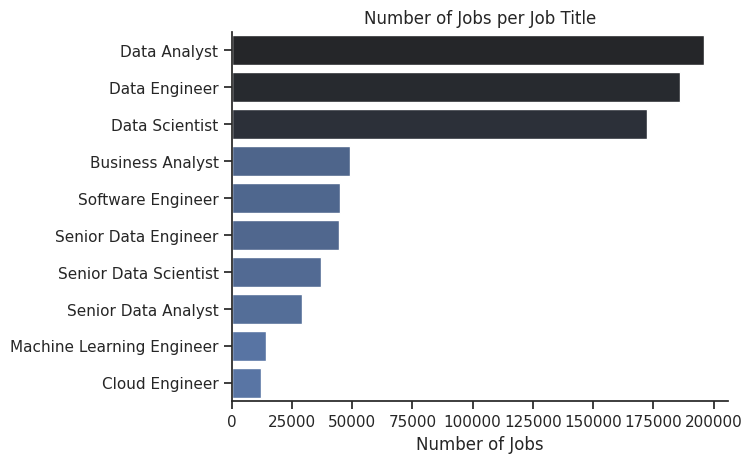

In [ ]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

2. Which companies are hiring the most for data-related positions?

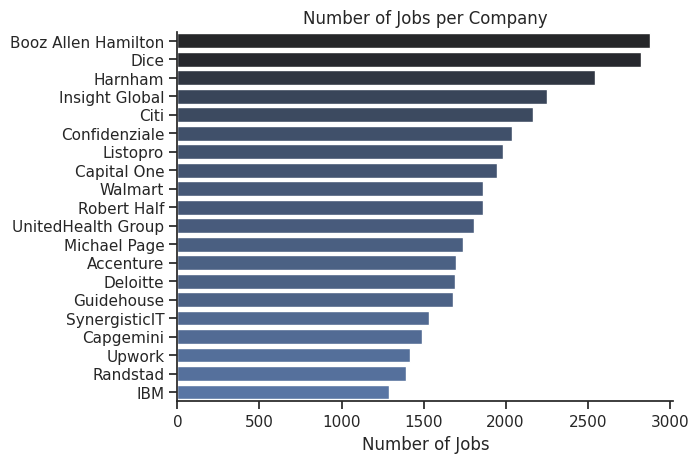

In [ ]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

3.  How has the number of data job postings changed over time?

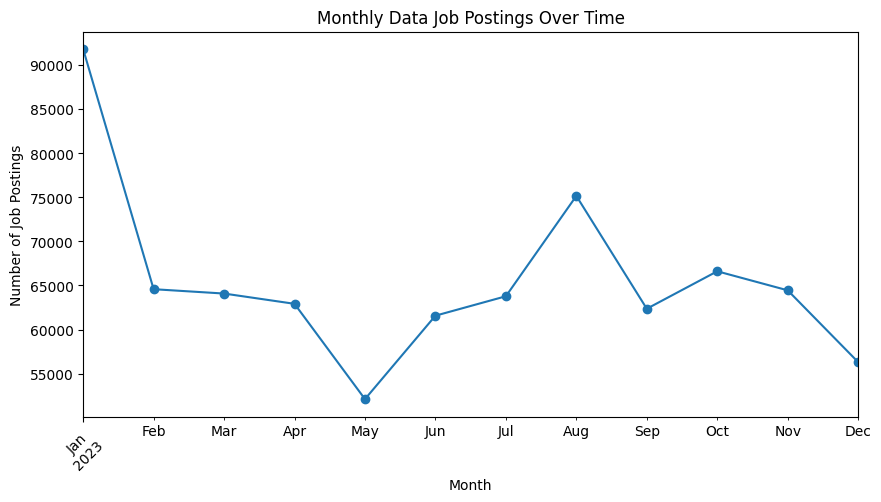

In [ ]:
df['month'] = df['job_posted_date'].dt.to_period('M')
monthly_trend = df['month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
monthly_trend.plot(kind='line', marker='o')
plt.title("Monthly Data Job Postings Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.show()



4. What percentage of jobs are Remote vs Not Remote?

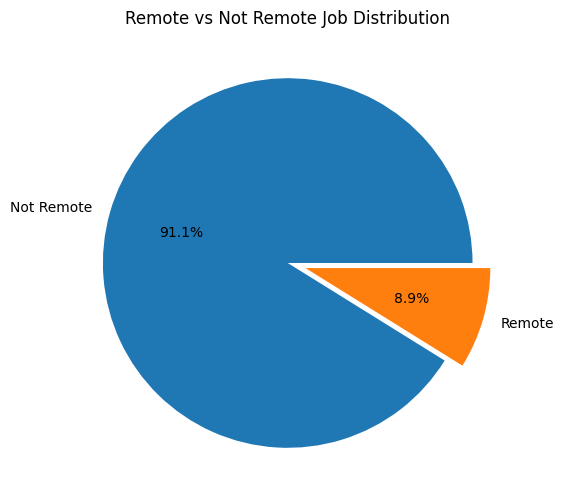

In [ ]:
remote_counts = df['job_work_from_home'].value_counts()

plt.figure(figsize=(6,6))
remote_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Not Remote', 'Remote'], explode=[0,0.1])
plt.title("Remote vs Not Remote Job Distribution")
plt.ylabel("")
plt.show()



5. Which locations have the highest number of job postings

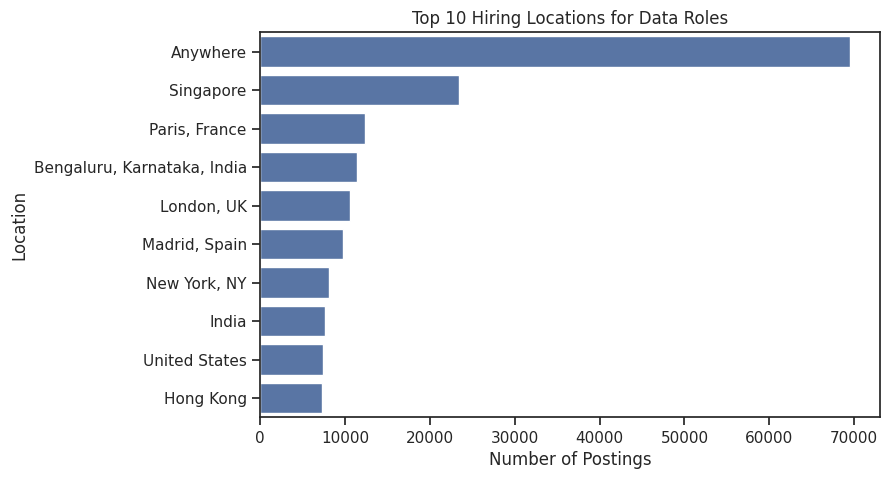

In [ ]:
top_locations = df['job_location'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 10 Hiring Locations for Data Roles")
plt.xlabel("Number of Postings")
plt.ylabel("Location")
plt.show()
